## This notebook will analyse and visualise the results of the cocktail party nightmare as the variation in heading direction in a group of bats increases. The results shown here are what the centre-most bat in the group will be experiencing.  All simulations were carried out for a group of 25 bats.

In [59]:
import re
import glob
import pickle
import sys
sys.path.append('..//')
from extract_results_from_simoutput import *


In [60]:
#load results
theta_var = [0,45,90,135]
result_files = ['..\\simulations\\effect_of_group_heading_variation\\results\\'+'Nbats_10_headingvariation_'+str(r)+'bats_CPN.pkl' for r in theta_var]
# extract relevant information from simulation outputs:
r_groups, theta_groups, nn_groups, level_groups  = {}, {}, {}, {}
echoesheard = {}

for i,groupsize in enumerate(theta_var):
    with open(result_files[i], 'rb') as results:
        simoutputs = pickle.load(results)
        group_results = []
        numechoes_heard = []
        for _, outputs in simoutputs.iteritems():
            processed_results = gather_results_from_simoutput(outputs)
            num_echoes = processed_results.shape[0]
            group_results.append(processed_results)
            numechoes_heard.append(num_echoes)
        r, theta, nn, level = np.split(np.concatenate(group_results).reshape(-1,4), 4, axis=1)
        echoesheard[groupsize] = numechoes_heard
        r_groups[groupsize] = r
        theta_groups[groupsize] = theta
        nn_groups[groupsize] = nn
        level_groups[groupsize] = level

In [61]:
%matplotlib notebook

<IPython.core.display.Javascript object>


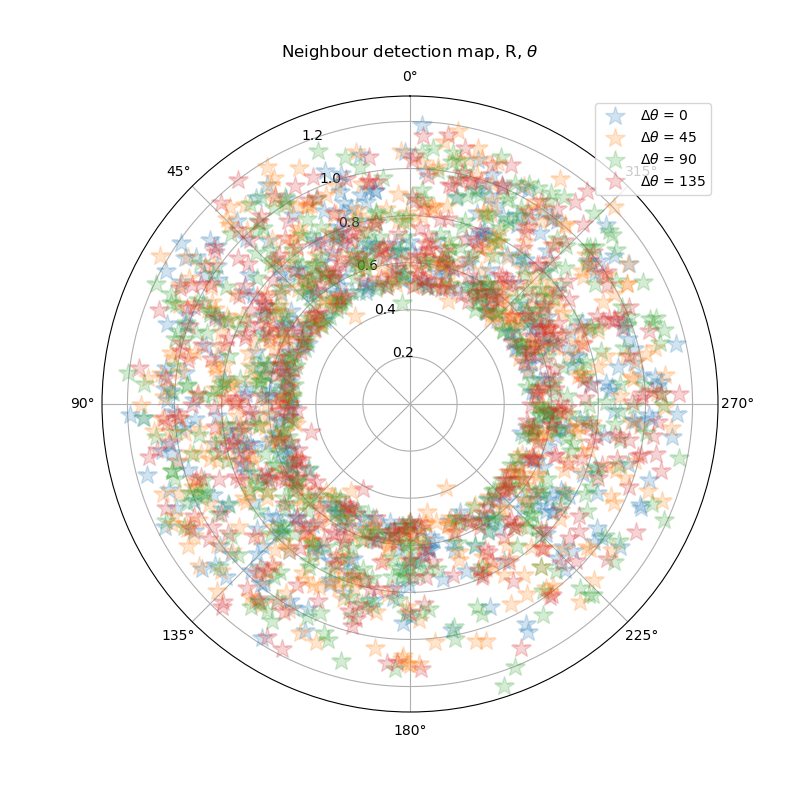

In [62]:
plt.figure(figsize=(8,8))
a = plt.subplot(111, projection='polar')
a.set_theta_zero_location("N")
for theta in theta_var:
    plt.plot(np.deg2rad(theta_groups[theta]),r_groups[theta],  '*', markersize=15,
             alpha=0.2, label='$\Delta \\theta $ = '+str(theta ))
plt.legend()
plt.title('Neighbour detection map, R, $\\theta$');

<IPython.core.display.Javascript object>


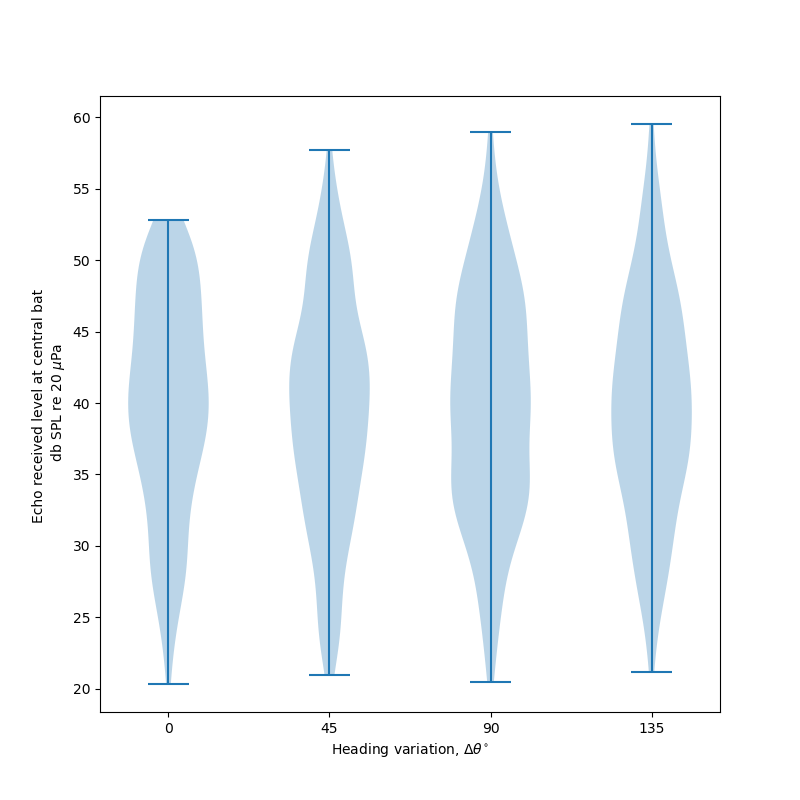

Text(0.5,0,'Heading variation, $\\Delta \\theta ^{\\circ}$')

In [63]:
echo_levels = [ level_groups[theta] for theta in theta_var]
plt.figure(figsize=(8,8))
plt.violinplot(echo_levels);
plt.ylabel('Echo received level at central bat \n db SPL re 20 $\\mu$Pa')
plt.xticks(range(1,5), theta_var);plt.xlabel('Heading variation, $\Delta \\theta ^{\circ}$')

<IPython.core.display.Javascript object>


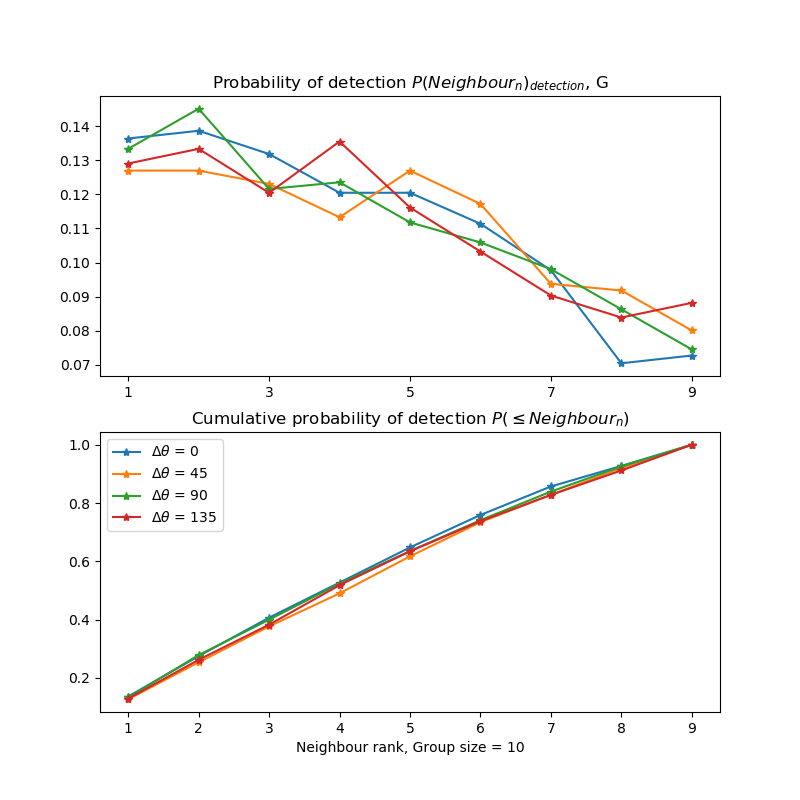

In [64]:
# visualise how the nearest neighbours detected changes with group size:
plt.figure(figsize=(8,8))
for theta in theta_var:
    nn, nn_counts = np.unique(np.int64(nn_groups[theta].flatten()), return_counts=True)
    plt.subplot(211)
    plt.title('Probability of detection $P(Neighbour_{n})_{detection}$, G')
    plt.plot(nn, nn_counts/float(np.sum(nn_counts)), '*-', )
    plt.xticks(np.arange(1,10,2));plt.grid()
    plt.subplot(212)
    plt.title('Cumulative probability of detection $P(\leq Neighbour_{n})$')
    plt.plot(nn, np.cumsum(nn_counts/float(np.sum(nn_counts))), '*-', label='$\Delta \\theta$ = '+str(theta))
    plt.xlabel('Neighbour rank, Group size = 10')
#plt.xticks(np.arange(1,25,2));plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


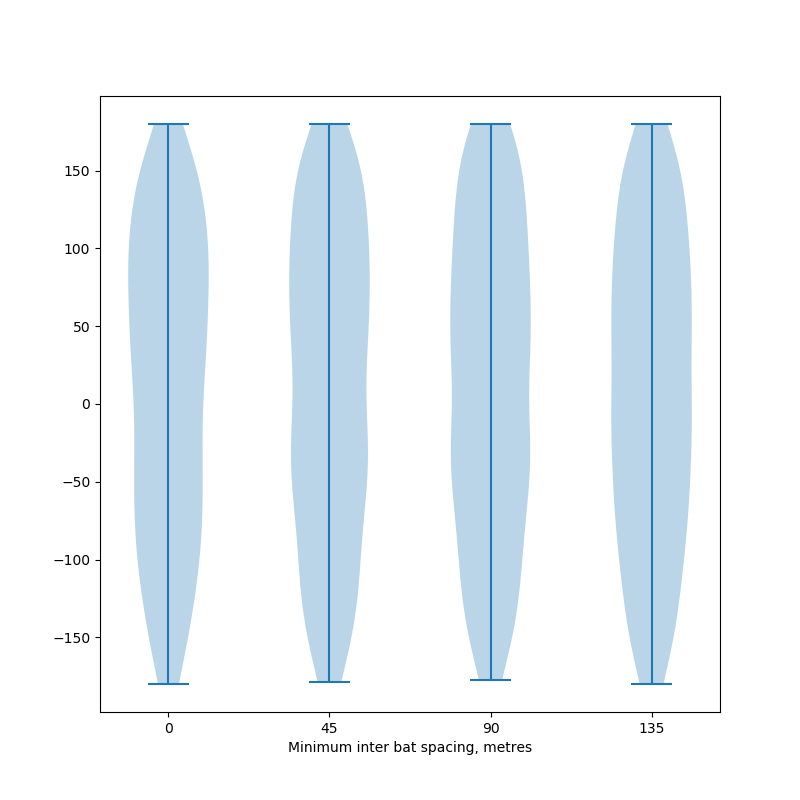

Text(0.5,0,'Minimum inter bat spacing, metres')

In [65]:
plt.figure(figsize=(8,8))
angles = [theta_groups[theta] for theta in theta_var]
plt.violinplot(angles)
plt.xticks(range(1,5), theta_var);plt.xlabel('Minimum inter bat spacing, metres')

<IPython.core.display.Javascript object>


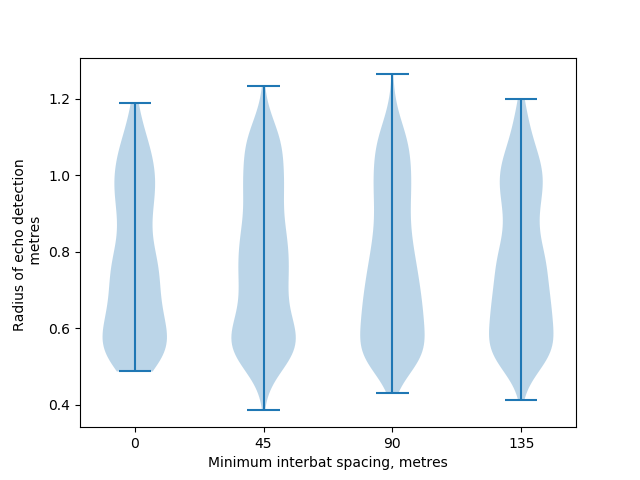

Text(0.5,0,'Minimum interbat spacing, metres')

In [66]:
plt.figure()
radii_detection = [r_groups[theta] for theta in theta_var]
plt.violinplot(radii_detection)
plt.ylabel('Radius of echo detection \n metres')
plt.xticks(range(1,5), theta_var);plt.xlabel('Minimum interbat spacing, metres')

<IPython.core.display.Javascript object>


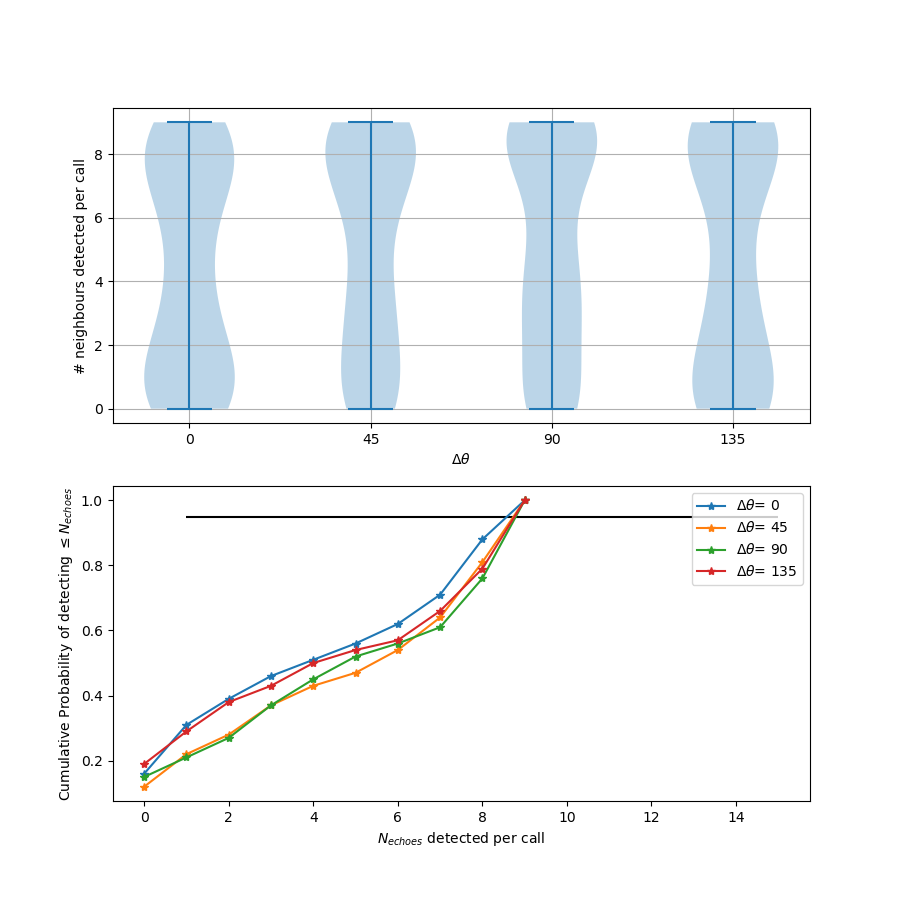

In [67]:
plt.figure(figsize=(9,9))
numechoes = [echoesheard[theta] for theta in theta_var]

plt.subplot(211)
plt.violinplot(numechoes);plt.xticks(range(1,5), theta_var);plt.xlabel('$\Delta \\theta$');
plt.ylabel('# neighbours detected per call');plt.grid()
plt.subplot(212)
for theta in theta_var:
    numechoes, freq_heard = np.unique(echoesheard[theta], return_counts=True)
    plt.plot(numechoes, np.cumsum(freq_heard/float(np.sum(freq_heard))), '*-',
            label='$\Delta \\theta$= '+str(theta));plt.grid()
plt.ylabel('Cumulative Probability of detecting $\leq N_{echoes}$ ')
plt.xlabel('$N_{echoes}$ detected per call')
plt.hlines(0.95,1,15)
plt.legend()